In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np


In [2]:
#Load the excel file
data = pd.read_excel("/Users/shefalibano/Downloads/Python Project/Stock Market/Bucharest Stock Exchange Data - YTD 2023.xlsx")

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
# Display the first few rows of the DataFrame
data.head()

,MIC,Investment Code,ISIN,Currency,Investment Name,Investment Type,Exchange,Comment,Issued Shares,Start trading date
0,XBSE,2P,ROZMYY1W6LM9,RON,2Performant Network SA,Equity,ROBSE,Market : XRS1,13033043.0,2020-12-09
1,XBSE,AAB,ROJ1IZXEYIU6,RON,Agroland Agribusiness,Equity,ROBSE,Market : XRS1,5625000.0,2021-06-15
2,XBSE,AAG,ROAAGEACNOR7,RON,S.C Aages S.A.,Equity,ROBSE,Market : REGS,10000000.0,2017-06-19
3,XBSE,ADISS,ROL8TEGLBRX2,RON,Adiss SA,Equity,ROBSE,Market : XRS1,16980000.0,2021-08-09
4,XBSE,AG,RO3UHXXNWZE0,RON,Agroland Business System SA,Equity,ROBSE,Market : XRS1,88044014.0,2021-01-03


In [5]:
#Load all the sheets of excel file
all_sheet = pd.read_excel("/Users/shefalibano/Downloads/Python Project/Stock Market/Bucharest Stock Exchange Data - YTD 2023.xlsx", sheet_name = None)

In [6]:
# Display the names of the sheets
all_sheet.keys()

dict_keys(['Investments', 'Industry Sector for REGS', 'Market Price', 'Exchange Rates'])

In [7]:
# Display the first few rows of each sheet
for sheet_name ,df in all_sheet.items():
    print(f"first few rows of '{sheet_name}' sheet:")
    display(df.head())
    print("\n")

first few rows of 'Investments' sheet:


,MIC,Investment Code,ISIN,Currency,Investment Name,Investment Type,Exchange,Comment,Issued Shares,Start trading date
0,XBSE,2P,ROZMYY1W6LM9,RON,2Performant Network SA,Equity,ROBSE,Market : XRS1,13033043.0,2020-12-09
1,XBSE,AAB,ROJ1IZXEYIU6,RON,Agroland Agribusiness,Equity,ROBSE,Market : XRS1,5625000.0,2021-06-15
2,XBSE,AAG,ROAAGEACNOR7,RON,S.C Aages S.A.,Equity,ROBSE,Market : REGS,10000000.0,2017-06-19
3,XBSE,ADISS,ROL8TEGLBRX2,RON,Adiss SA,Equity,ROBSE,Market : XRS1,16980000.0,2021-08-09
4,XBSE,AG,RO3UHXXNWZE0,RON,Agroland Business System SA,Equity,ROBSE,Market : XRS1,88044014.0,2021-01-03




first few rows of 'Industry Sector for REGS' sheet:


,Investment Code,Company Name,Industry Sector
0,AAG,Aages ( AAG ),Industrials
1,ALR,ALRO S.A. ( ALR ),Materials
2,ALT,ALTUR S.A. ( ALT ),Consumer Discretionary
3,ALU,Alumil Rom Industry ( ALU ),Materials
4,AQ,Aquila Part Prod Com ( AQ ),Industrials




first few rows of 'Market Price' sheet:


,Price Date,MIC,Ticker,ISIN,Currency,Close Price,Traded Volume,Issued Shares,Traded Value,Market Capitalization
0,2022-12-30,XBSE,2P,ROZMYY1W6LM9,RON,1.350,15102,13033043,20387.700,1.759461e+07
1,2023-01-03,XBSE,2P,ROZMYY1W6LM9,RON,1.365,129,13033043,176.085,1.779010e+07
2,2023-01-04,XBSE,2P,ROZMYY1W6LM9,RON,1.440,522,13033043,751.680,1.876758e+07
3,2023-01-05,XBSE,2P,ROZMYY1W6LM9,RON,1.440,345,13033043,496.800,1.876758e+07
4,2023-01-06,XBSE,2P,ROZMYY1W6LM9,RON,1.540,21172,13033043,32604.880,2.007089e+07




first few rows of 'Exchange Rates' sheet:


,Currency,Counter Currency,Quotation Source,Quotation Date,Pair Code,Rate
0,RON,EUR,ECB,2022-12-30,EUR/RON,4.9495
1,RON,EUR,ECB,2023-01-02,EUR/RON,4.9400
2,RON,EUR,ECB,2023-01-03,EUR/RON,4.9310
3,RON,EUR,ECB,2023-01-04,EUR/RON,4.9264
4,RON,EUR,ECB,2023-01-05,EUR/RON,4.9235


In [8]:
#Define a function to summarize data quality

def summarize_data(df):
    summary = pd.DataFrame(df.dtypes,columns = ['Data Type'])
    summary['Missing Values'] = df.isnull().sum()
    summary['Unique Values'] = df.nunique()
    return summary

#Summarize the data in each set

data_summary = {}
for sheet_name,df in all_sheet.items():
    print(f"First few rows of '{sheet_name}' sheet.")
    data_summary[sheet_name] = summarize_data(df)
    display(data_summary[sheet_name])
    print("\n")

First few rows of 'Investments' sheet.


,Data Type,Missing Values,Unique Values
MIC,object,0,1
Investment Code,object,0,105
ISIN,object,2,103
Currency,object,0,1
Investment Name,object,0,105
Investment Type,object,0,2
Exchange,object,0,1
Comment,object,2,2
Issued Shares,float64,2,103
Start trading date,datetime64[ns],2,94




First few rows of 'Industry Sector for REGS' sheet.


,Data Type,Missing Values,Unique Values
Investment Code,object,0,87
Company Name,object,0,87
Industry Sector,object,0,10




First few rows of 'Market Price' sheet.


,Data Type,Missing Values,Unique Values
Price Date,datetime64[ns],0,82
MIC,object,0,1
Ticker,object,0,105
ISIN,object,164,103
Currency,object,0,1
Close Price,float64,0,2221
Traded Volume,int64,0,5476
Issued Shares,int64,0,104
Traded Value,float64,0,6745
Market Capitalization,float64,0,3292




First few rows of 'Exchange Rates' sheet.


,Data Type,Missing Values,Unique Values
Currency,object,0,1
Counter Currency,object,0,1
Quotation Source,object,0,1
Quotation Date,datetime64[ns],0,84
Pair Code,object,0,1
Rate,float64,0,77


In [9]:
# Display the column names and first few rows of the 'Exchange Rates' sheet
all_sheet['Exchange Rates'].head()

,Currency,Counter Currency,Quotation Source,Quotation Date,Pair Code,Rate
0,RON,EUR,ECB,2022-12-30,EUR/RON,4.9495
1,RON,EUR,ECB,2023-01-02,EUR/RON,4.9400
2,RON,EUR,ECB,2023-01-03,EUR/RON,4.9310
3,RON,EUR,ECB,2023-01-04,EUR/RON,4.9264
4,RON,EUR,ECB,2023-01-05,EUR/RON,4.9235


In [10]:
#Load the 'Investments' sheet
investment_df = all_sheet['Investments']

#Load first few rows of Investments
investment_df.head()

,MIC,Investment Code,ISIN,Currency,Investment Name,Investment Type,Exchange,Comment,Issued Shares,Start trading date
0,XBSE,2P,ROZMYY1W6LM9,RON,2Performant Network SA,Equity,ROBSE,Market : XRS1,13033043.0,2020-12-09
1,XBSE,AAB,ROJ1IZXEYIU6,RON,Agroland Agribusiness,Equity,ROBSE,Market : XRS1,5625000.0,2021-06-15
2,XBSE,AAG,ROAAGEACNOR7,RON,S.C Aages S.A.,Equity,ROBSE,Market : REGS,10000000.0,2017-06-19
3,XBSE,ADISS,ROL8TEGLBRX2,RON,Adiss SA,Equity,ROBSE,Market : XRS1,16980000.0,2021-08-09
4,XBSE,AG,RO3UHXXNWZE0,RON,Agroland Business System SA,Equity,ROBSE,Market : XRS1,88044014.0,2021-01-03


In [11]:
# Check the data types and missing values in the 'Investments' sheet
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MIC                 105 non-null    object        
 1   Investment Code     105 non-null    object        
 2   ISIN                103 non-null    object        
 3   Currency            105 non-null    object        
 4   Investment Name     105 non-null    object        
 5   Investment Type     105 non-null    object        
 6   Exchange            105 non-null    object        
 7   Comment             103 non-null    object        
 8   Issued Shares       103 non-null    float64       
 9   Start trading date  103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 8.3+ KB


In [12]:
# Load the 'Industry Sector for REGS' sheet
industry_sector_df = all_sheet['Industry Sector for REGS']

#Load first few rows of Industry Sector for REGS
industry_sector_df.head()

,Investment Code,Company Name,Industry Sector
0,AAG,Aages ( AAG ),Industrials
1,ALR,ALRO S.A. ( ALR ),Materials
2,ALT,ALTUR S.A. ( ALT ),Consumer Discretionary
3,ALU,Alumil Rom Industry ( ALU ),Materials
4,AQ,Aquila Part Prod Com ( AQ ),Industrials


In [13]:
# Check the data types and missing values in the 'Industry Sector for REGS' sheet
industry_sector_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Investment Code  87 non-null     object
 1   Company Name     87 non-null     object
 2   Industry Sector  87 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [14]:
# Load the 'Market Price' sheet
market_price_df = all_sheet['Market Price']

#Load first few rows of Market Price
market_price_df.head()

,Price Date,MIC,Ticker,ISIN,Currency,Close Price,Traded Volume,Issued Shares,Traded Value,Market Capitalization
0,2022-12-30,XBSE,2P,ROZMYY1W6LM9,RON,1.350,15102,13033043,20387.700,1.759461e+07
1,2023-01-03,XBSE,2P,ROZMYY1W6LM9,RON,1.365,129,13033043,176.085,1.779010e+07
2,2023-01-04,XBSE,2P,ROZMYY1W6LM9,RON,1.440,522,13033043,751.680,1.876758e+07
3,2023-01-05,XBSE,2P,ROZMYY1W6LM9,RON,1.440,345,13033043,496.800,1.876758e+07
4,2023-01-06,XBSE,2P,ROZMYY1W6LM9,RON,1.540,21172,13033043,32604.880,2.007089e+07


In [15]:
# Check the data types and missing values in the 'Market Price' sheet
market_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028 entries, 0 to 7027
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Price Date             7028 non-null   datetime64[ns]
 1   MIC                    7028 non-null   object        
 2   Ticker                 7028 non-null   object        
 3   ISIN                   6864 non-null   object        
 4   Currency               7028 non-null   object        
 5   Close Price            7028 non-null   float64       
 6   Traded Volume          7028 non-null   int64         
 7   Issued Shares          7028 non-null   int64         
 8   Traded Value           7028 non-null   float64       
 9   Market Capitalization  7028 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 549.2+ KB


In [16]:
# Load the 'Exchange Rates' sheet
exchange_rate_df = all_sheet['Exchange Rates']

#Load first few rows of Exchange Rates
exchange_rate_df.head()

,Currency,Counter Currency,Quotation Source,Quotation Date,Pair Code,Rate
0,RON,EUR,ECB,2022-12-30,EUR/RON,4.9495
1,RON,EUR,ECB,2023-01-02,EUR/RON,4.9400
2,RON,EUR,ECB,2023-01-03,EUR/RON,4.9310
3,RON,EUR,ECB,2023-01-04,EUR/RON,4.9264
4,RON,EUR,ECB,2023-01-05,EUR/RON,4.9235


In [17]:
# Check the data types and missing values in the 'Market Price' sheet
exchange_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Currency          84 non-null     object        
 1   Counter Currency  84 non-null     object        
 2   Quotation Source  84 non-null     object        
 3   Quotation Date    84 non-null     datetime64[ns]
 4   Pair Code         84 non-null     object        
 5   Rate              84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 4.1+ KB


In [18]:
# Drop the rows with missing 'ISIN' in the 'Market Price' sheet

market_price_df = market_price_df.dropna(subset = ['ISIN'])

In [19]:
# Check the data types and missing values in the 'Market Price' sheet again
market_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6864 entries, 0 to 6863
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Price Date             6864 non-null   datetime64[ns]
 1   MIC                    6864 non-null   object        
 2   Ticker                 6864 non-null   object        
 3   ISIN                   6864 non-null   object        
 4   Currency               6864 non-null   object        
 5   Close Price            6864 non-null   float64       
 6   Traded Volume          6864 non-null   int64         
 7   Issued Shares          6864 non-null   int64         
 8   Traded Value           6864 non-null   float64       
 9   Market Capitalization  6864 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 589.9+ KB


In [20]:
# Check the first few rows of the data
market_price_df.head()

,Price Date,MIC,Ticker,ISIN,Currency,Close Price,Traded Volume,Issued Shares,Traded Value,Market Capitalization
0,2022-12-30,XBSE,2P,ROZMYY1W6LM9,RON,1.350,15102,13033043,20387.700,1.759461e+07
1,2023-01-03,XBSE,2P,ROZMYY1W6LM9,RON,1.365,129,13033043,176.085,1.779010e+07
2,2023-01-04,XBSE,2P,ROZMYY1W6LM9,RON,1.440,522,13033043,751.680,1.876758e+07
3,2023-01-05,XBSE,2P,ROZMYY1W6LM9,RON,1.440,345,13033043,496.800,1.876758e+07
4,2023-01-06,XBSE,2P,ROZMYY1W6LM9,RON,1.540,21172,13033043,32604.880,2.007089e+07


In [21]:
market_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6864 entries, 0 to 6863
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Price Date             6864 non-null   datetime64[ns]
 1   MIC                    6864 non-null   object        
 2   Ticker                 6864 non-null   object        
 3   ISIN                   6864 non-null   object        
 4   Currency               6864 non-null   object        
 5   Close Price            6864 non-null   float64       
 6   Traded Volume          6864 non-null   int64         
 7   Issued Shares          6864 non-null   int64         
 8   Traded Value           6864 non-null   float64       
 9   Market Capitalization  6864 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 589.9+ KB


In [22]:
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MIC                 105 non-null    object        
 1   Investment Code     105 non-null    object        
 2   ISIN                103 non-null    object        
 3   Currency            105 non-null    object        
 4   Investment Name     105 non-null    object        
 5   Investment Type     105 non-null    object        
 6   Exchange            105 non-null    object        
 7   Comment             103 non-null    object        
 8   Issued Shares       103 non-null    float64       
 9   Start trading date  103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 8.3+ KB


In [23]:
# Drop the rows with missing 'ISIN' in the 'Market Price' sheet
investment_df = investment_df.dropna(subset=['ISIN'])

In [24]:
# Check the data types and missing values in the 'Investments' sheet again
investment_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MIC                 103 non-null    object        
 1   Investment Code     103 non-null    object        
 2   ISIN                103 non-null    object        
 3   Currency            103 non-null    object        
 4   Investment Name     103 non-null    object        
 5   Investment Type     103 non-null    object        
 6   Exchange            103 non-null    object        
 7   Comment             103 non-null    object        
 8   Issued Shares       103 non-null    float64       
 9   Start trading date  103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 8.9+ KB


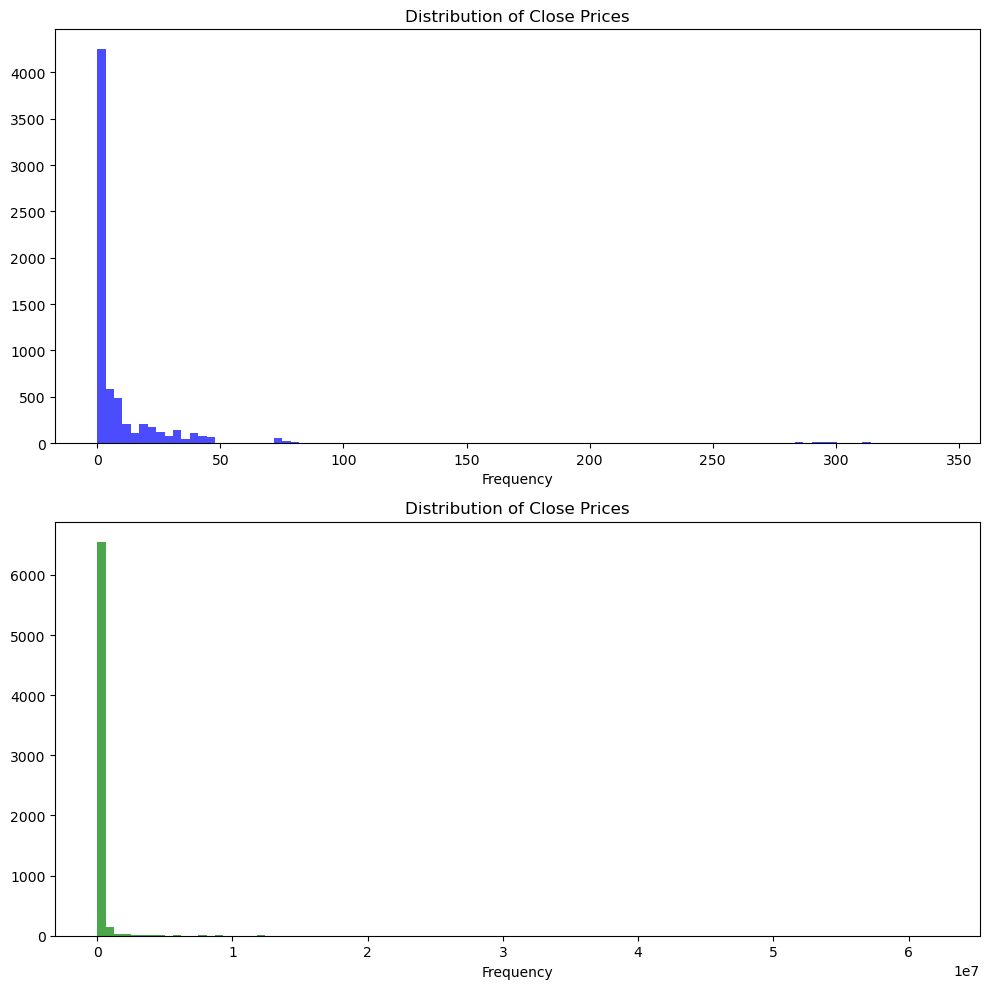

In [25]:
import matplotlib.pyplot as plt

# Plot histograms for 'Close Price' and 'Traded Volume'
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 'Close Price' histogram
axs[0].hist(market_price_df['Close Price'], bins=100, color='blue',alpha=0.7 )
axs[0].set_title("Distribution of Close Prices")
axs[0].set_xlabel('Close Price')
axs[0].set_xlabel('Frequency')

# 'Traded Volume' histogram
axs[1].hist(market_price_df['Traded Volume'], bins=100, color='green',alpha=0.7 )
axs[1].set_title("Distribution of Close Prices")
axs[1].set_xlabel('Traded Volume')
axs[1].set_xlabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

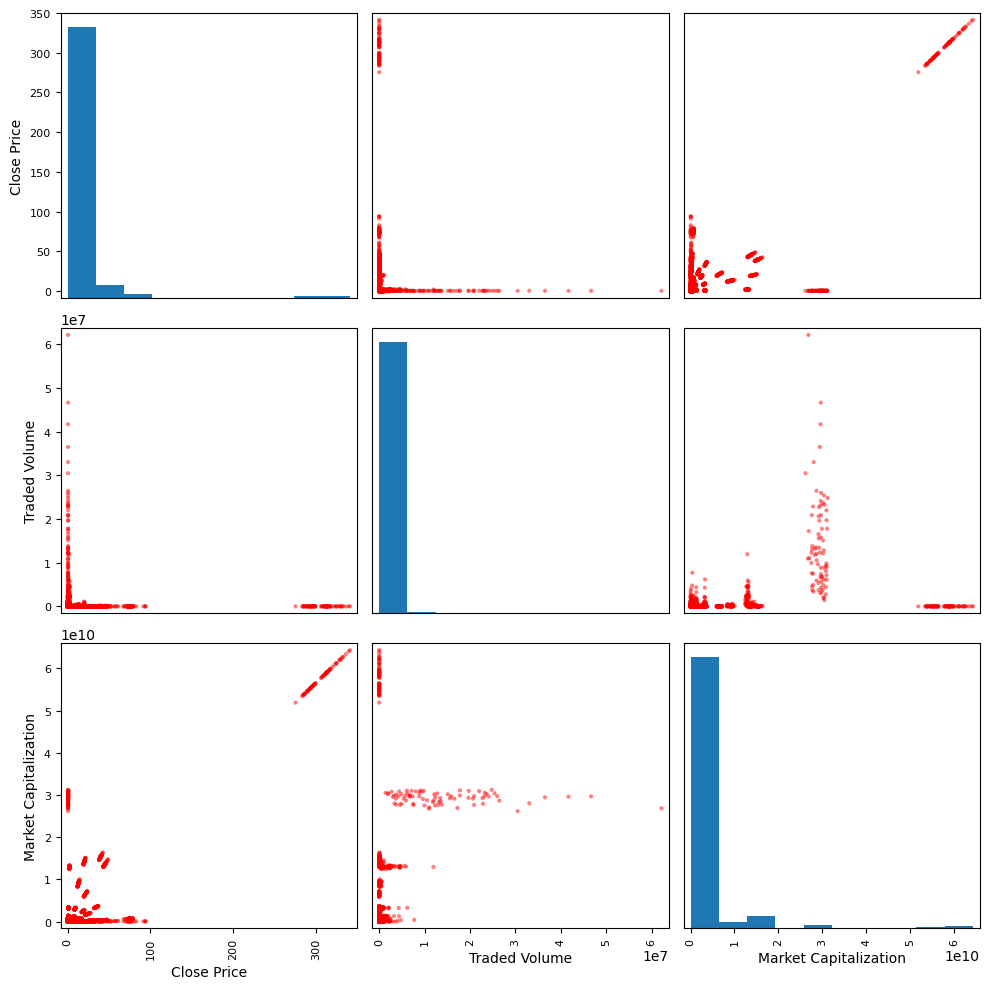

In [26]:
#select a subset of a data
subset_df = market_price_df[['Close Price','Traded Volume','Market Capitalization']]

# Generate a scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(subset_df,color='red',figsize =(10,10))

#show the plot
plt.tight_layout()
plt.show()

In [27]:
#compute the correlation matrix
correlation_matrix = market_price_df[['Close Price','Traded Volume','Market Capitalization']].corr()

# Display the correlation matrix
correlation_matrix

,Close Price,Traded Volume,Market Capitalization
Close Price,1.000000,-0.038366,0.802541
Traded Volume,-0.038366,1.000000,0.315707
Market Capitalization,0.802541,0.315707,1.000000


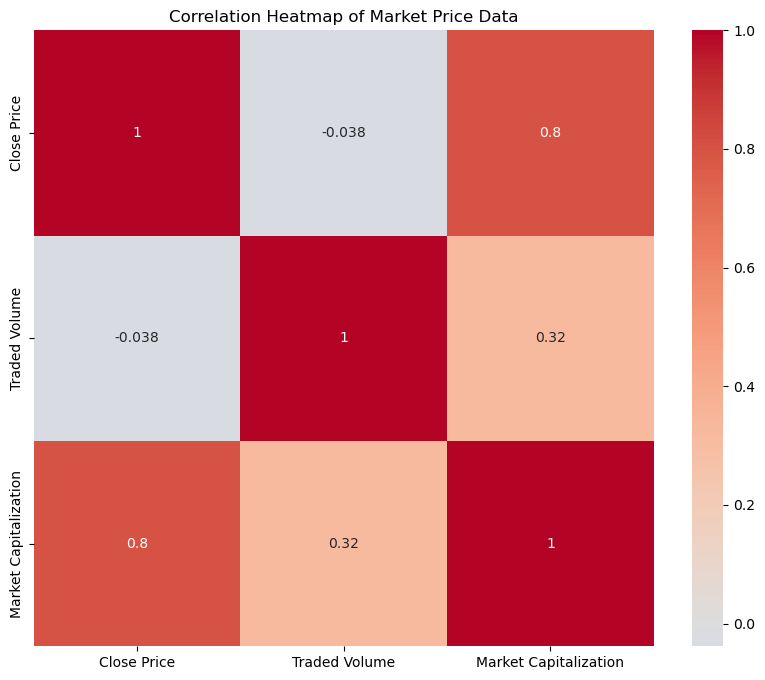

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#create a heatmap from the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',center=0)

# Set the title for the heatmap
plt.title('Correlation Heatmap of Market Price Data')

#display the heatmap
plt.show()


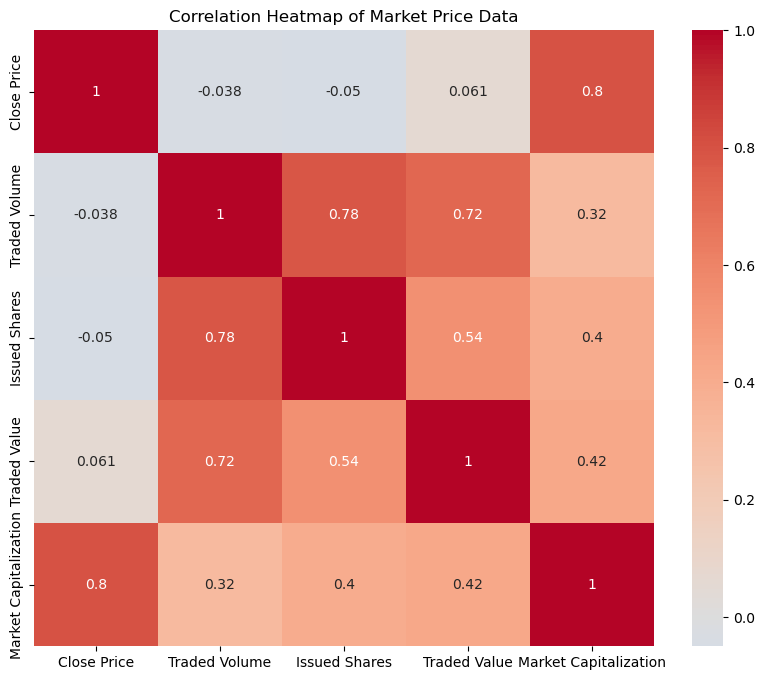

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculate the correlation matrix
correlation_matrix = market_price_df[['Close Price', 'Traded Volume','Issued Shares','Traded Value', 'Market Capitalization']].corr()

#Create a heatmap from the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)

# Set the title for the heatmap
plt.title('Correlation Heatmap of Market Price Data')

# Display the heatmap
plt.show()

Text(0, 0.5, 'Frequency')

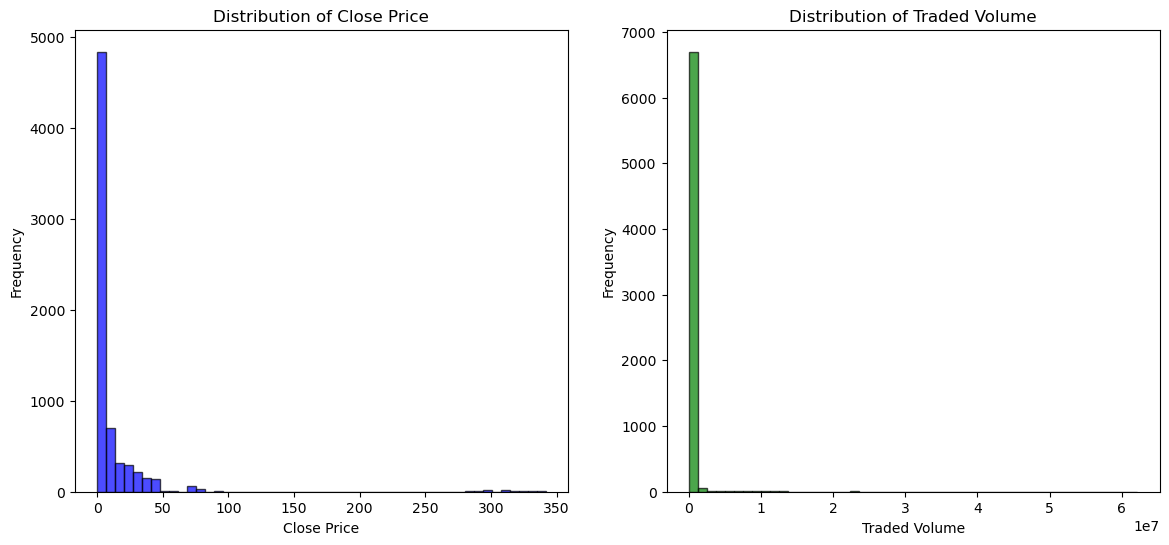

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define figure size
plt.figure(figsize=(14,6))

# Plot histogram for Close Price
plt.subplot(1, 2, 1)
plt.hist(market_price_df['Close Price'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Plot histogram for Traded Volume
plt.subplot(1, 2, 2)
plt.hist(market_price_df['Traded Volume'], bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Traded Volume')
plt.xlabel('Traded Volume')
plt.ylabel('Frequency')